<a href="https://colab.research.google.com/github/KTUYTS/cs441-19-sp2023-data-visualization/blob/main/cs441_sp2023_tuyts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

import io
my_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train (1).csv


In [ ]:
my_data = pd.read_csv('train.csv')

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(my_data.head())
my_data.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="whitegrid")

data = [train_data]
for dataset in data:
    mean = train_data["Age"].mean()
    std = train_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


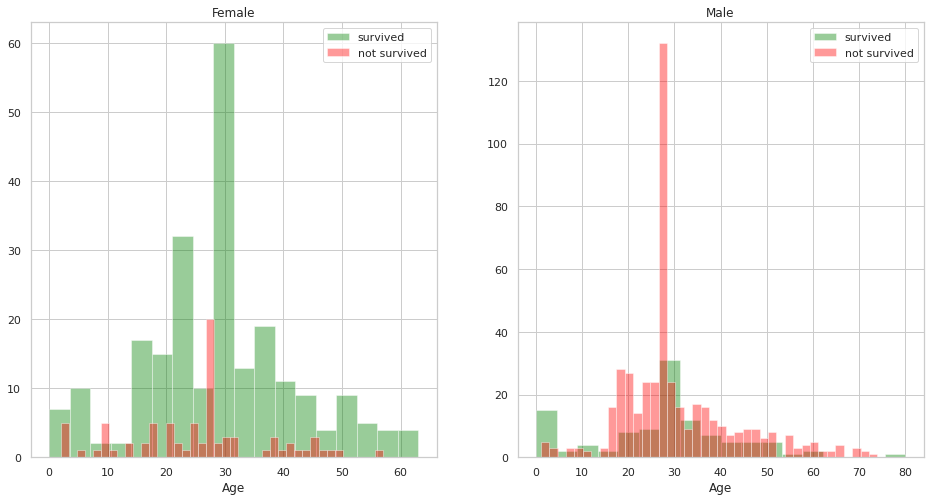

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

<AxesSubplot:xlabel='Fare', ylabel='Count'>

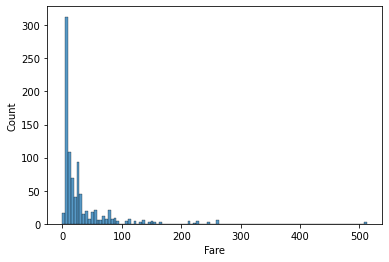

In [ ]:
sns.histplot(data=my_data, x="Fare")
#sns.kdeplot(data=my_data, x="Fare")

Density Plot of Age for Surviving Population and Deceased Population


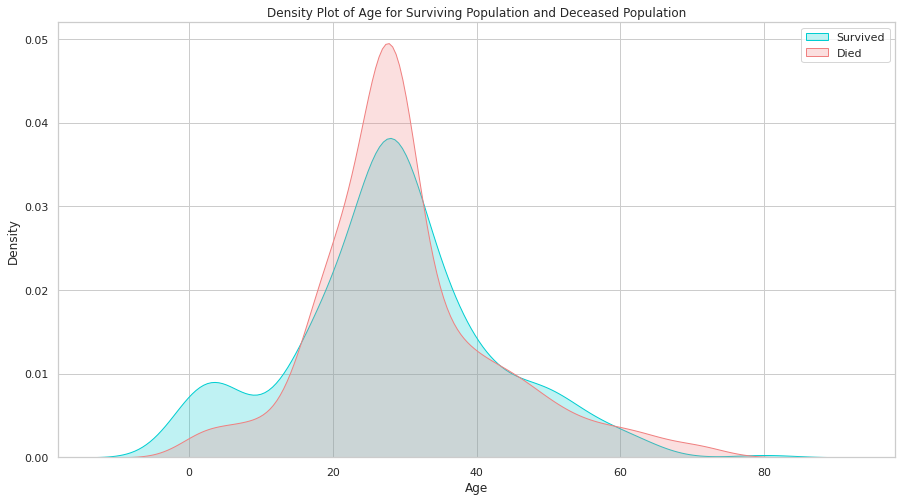

In [ ]:
print("Density Plot of Age for Surviving Population and Deceased Population")
plt.figure(figsize=(15,8))
sns.kdeplot(train_data["Age"][train_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/petfinder_adoption.csv")


In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Type           14993 non-null  int64   
 1   Name           13736 non-null  object  
 2   Age            14993 non-null  int64   
 3   Breed1         14993 non-null  int64   
 4   Breed2         14993 non-null  int64   
 5   Gender         14993 non-null  int64   
 6   Color1         14993 non-null  int64   
 7   Color2         14993 non-null  int64   
 8   Color3         14993 non-null  int64   
 9   MaturitySize   14993 non-null  int64   
 10  FurLength      14993 non-null  int64   
 11  Vaccinated     14993 non-null  int64   
 12  Dewormed       14993 non-null  int64   
 13  Sterilized     14993 non-null  int64   
 14  Health         14993 non-null  int64   
 15  Quantity       14993 non-null  int64   
 16  Fee            14993 non-null  int64   
 17  State          14993 non-null  

In [32]:
print(df.head())

   Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Quantity  Fee  State                         RescuerID  \
0             1  ...         1  100  41326  8480853f516546f6cf33aa88cd76c379   
1             2  ...         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14   
2             2  ...         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb   
3             2  ...         1  150  41401  9238e4f44c71a75282e62f7136c6b240   
4             2  ...         1    0  41326  95481e953f8aed9ec3d16fc4509537e8   

   VideoAmt                                        Descr

In [31]:
print(df.describe())


               Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086    

In [34]:
columns_to_explore = ['Gender', 'Quantity']

In [35]:
selected_columns_df = df[columns_to_explore]


In [40]:
selected_columns_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Gender    14993 non-null  int64
 1   Quantity  14993 non-null  int64
dtypes: int64(2)
memory usage: 234.4 KB


In [36]:
selected_columns_df.head()


,Gender,Quantity
0,1,1
1,1,1
2,1,1
3,2,1
4,1,1


<Axes: xlabel='Gender', ylabel='Quantity'>

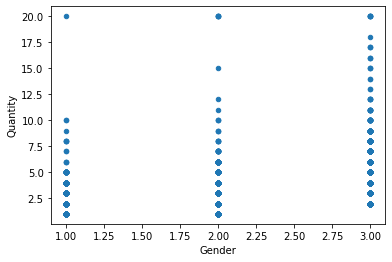

In [42]:
selected_columns_df.plot(kind='scatter', x='Gender', y='Quantity')
